# Income Classification
In this project, we will be using a dataset containing information from the 1994 Census database to create a logistic regression model that predicts whether or not a person makes more than $50,000.

**Data Sources**
The information source comes from UCI Machine Learning Repository [here](https://archive.ics.uci.edu/dataset/20/census+income).

The information included is:
- `age`: continuous
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
- `sex`: Female, Male
- `capital-gain`: continuous
- `capital-loss`: continuous
- `hours-per-week`: continuous
- `native country`: discrete
- `income`: discrete, >50K, <=50K

# Import Python Modules
To start, import the preliminary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
Now, lets visualize the data from `adult.csv` while also adding the names to columns. For better understanding, the column of income will be 1 when it is greater than 50k a year, and 0 when it is less.

In [22]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

df = pd.read_csv('adult.csv', header = None, names = col_names)

# Change values of column with income
df['income'] = df['income'].replace({' <=50K':0, ' >50K':1})

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


We also need to see if the data is imbalanced, to take into consideration while training the data.

In [59]:
df['income'].value_counts(normalize=True)

income
0    0.75919
1    0.24081
Name: proportion, dtype: float64

## Preparation
Moving forward, we'll prepare the data prior fitting the model. First, lets create the matrix that will hold the features to train the model. The method `get_dummies` will be used to one-hot encode the categorical columns and the attribute `drop_first` will be set to `True` to colinear features that could cause a problem at the time of creating the model. 

In [65]:
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'education']
X = df[feature_cols]
X = pd.get_dummies(X, columns=['sex','race', 'education'], dtype=int, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       32561 non-null  int64
 1   capital-gain              32561 non-null  int64
 2   capital-loss              32561 non-null  int64
 3   hours-per-week            32561 non-null  int64
 4   sex_ Male                 32561 non-null  int32
 5   race_ Asian-Pac-Islander  32561 non-null  int32
 6   race_ Black               32561 non-null  int32
 7   race_ Other               32561 non-null  int32
 8   race_ White               32561 non-null  int32
 9   education_ 11th           32561 non-null  int32
 10  education_ 12th           32561 non-null  int32
 11  education_ 1st-4th        32561 non-null  int32
 12  education_ 5th-6th        32561 non-null  int32
 13  education_ 7th-8th        32561 non-null  int32
 14  education_ 9th            32561 non-nu

Now, lets see the correlation between values using a heatmap to see if there are any details of importance.

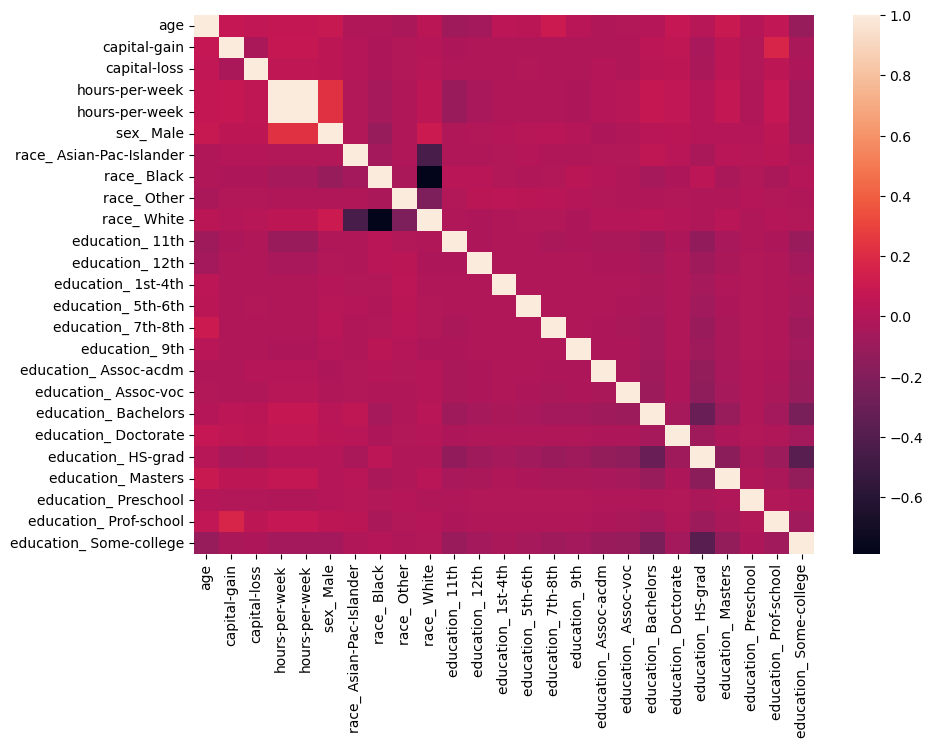

In [60]:
plt.figure(figsize = (10,7))
sns.heatmap(X.corr())
plt.show()

## Training and Testing Model
Next up, lets separate the dataset into training and testing samples that will be used for training and assesing the performance of the model.

In [67]:
# First, get the information about whether a person is getting more or less than 50k
y = df['income']

# Create the training and testing samples.
